In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats

For this challenge, I am looking at mlb batting stats in 2015. My outcome variable will be salary. I will focus on League, Runs, Hits, Home Runs, RBI, Stolen Bases, and Strike Outs. I have removed pitchesr from the data as their batting stats would be much lower. The column fields are as follows: playerID: Player ID Code, YearID: Year Slary: Player salary, stint: Player's sting (order or appearances in season), teamID: team, franchID: Team, franchName: Team Name, lgID, League, G: Games, AB: At Bats, R: Runs, H: Hits, 2B: Doubles, 3B: Triples, HR: Homerunes, RBI: Runs Batted In, SB: Stolen Bases, CS: Caught Stealing, BB: Base on Balls, SO: Strikeouts, IBB: Intnetional walks, HBP: Hit by pitch, SH: Sacrifice hits, SF: Sacrafice Flies, GIDP: Grounded into double plays.

## Exploring the data

In [115]:
df = pd.read_csv('batting_play.csv')

In [116]:
df.head(10)

,playerID,yearID,salary,stint,teamID,franchID,franchName,lgID,G,AB,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,bethach01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,48,155,...,12,1,1,5,33,1,0,0,0,7
1,centeju01,2015,507500.0,1,MIL,MIL,Milwaukee Brewers,NL,10,21,...,0,0,0,2,7,0,0,0,0,0
2,cunnito01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,39,86,...,4,2,1,5,17,1,2,0,0,1
3,gomezhe01,2015,507500.0,1,MIL,MIL,Milwaukee Brewers,NL,66,127,...,7,0,0,3,40,0,2,2,0,1
4,gosseph01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,20,40,...,2,2,0,2,5,0,0,0,0,0
5,gosseph01,2015,507500.0,2,ARI,ARI,Arizona Diamondbacks,NL,24,66,...,13,0,1,7,11,0,2,0,1,2
6,mccanja02,2015,507500.0,1,DET,DET,Detroit Tigers,AL,114,401,...,41,0,1,16,90,0,3,4,1,17
7,peterja01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,152,528,...,52,12,10,56,120,4,3,7,3,5
8,rogerja02,2015,507500.0,1,MIL,MIL,Milwaukee Brewers,NL,86,152,...,16,0,0,15,34,0,2,0,0,2
9,terdojo01,2015,507500.0,1,ATL,ATL,Atlanta Braves,NL,28,56,...,4,0,0,3,14,1,0,0,0,1


In [117]:
#subset of data
df2 = df.loc[:, ['salary', 'lgID', 'R', 'H', 'HR', 'RBI', 'SB', 'SO']]

In [118]:
df2.head(10)

,salary,lgID,R,H,HR,RBI,SB,SO
0,507500.0,NL,16,31,2,12,1,33
1,507500.0,NL,0,1,0,0,0,7
2,507500.0,NL,13,19,0,4,2,17
3,507500.0,NL,15,23,1,7,0,40
4,507500.0,NL,2,13,0,2,2,5
5,507500.0,NL,17,20,3,13,0,11
6,507500.0,AL,32,106,7,41,0,90
7,507500.0,NL,55,126,6,52,12,120
8,507500.0,NL,22,45,4,16,0,34
9,507500.0,NL,5,12,1,4,0,14


In [119]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 8 columns):
salary    426 non-null float64
lgID      649 non-null object
R         649 non-null int64
H         649 non-null int64
HR        649 non-null int64
RBI       649 non-null int64
SB        649 non-null int64
SO        649 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 38.1+ KB


I will drop the null values in salary, as the data does not contain salaries for all the listed players.

In [120]:
df2 = df2[df2['salary'].notnull()][['salary', 'lgID', 'R', 'H', 'HR', 'RBI', 'SB', 'SO']]

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 8 columns):
salary    426 non-null float64
lgID      426 non-null object
R         426 non-null int64
H         426 non-null int64
HR        426 non-null int64
RBI       426 non-null int64
SB        426 non-null int64
SO        426 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 28.3+ KB


In [122]:
# convert numerics to float
for col in df2.loc[:, 'R':'SO'].columns:
    df2[col] = df2[col].astype(float)

In [123]:
# Descriptive statistics for my outcome variable, salary
print(df2['salary'].describe())

count    4.260000e+02
mean     4.939774e+06
std      5.864819e+06
min      5.075000e+05
25%      5.254430e+05
50%      2.500000e+06
75%      6.889286e+06
max      2.500000e+07
Name: salary, dtype: float64


In [124]:
# convert salary into thousands
df2.loc[:, 'salary'] = round((df2['salary'] /10**3),2)

In [125]:
print(df2['salary'].describe())

count      426.000000
mean      4939.773897
std       5864.819167
min        507.500000
25%        525.440000
50%       2500.000000
75%       6889.285000
max      25000.000000
Name: salary, dtype: float64


In [126]:
df2.describe()

,salary,R,H,HR,RBI,SB,SO
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,4939.773897,39.241784,79.704225,9.455399,37.467136,4.859155,65.169014
std,5864.819167,28.821401,55.446524,9.446525,28.894617,7.769253,42.667354
min,507.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,525.440000,13.000000,27.000000,2.000000,11.250000,0.000000,29.000000
50%,2500.000000,36.000000,73.000000,6.000000,33.500000,2.000000,63.000000
75%,6889.285000,60.750000,127.000000,15.000000,58.000000,6.000000,97.750000
max,25000.000000,122.000000,205.000000,44.000000,130.000000,58.000000,187.000000


In [127]:
# removing rows where the sum of values is zero.

df3 = df2.loc[df2.loc[:,['R','H','HR','RBI','SB','SO']].sum(axis=1)!=0,:]

In [128]:
df3.shape

(422, 8)

In [129]:
df3.describe()

,salary,R,H,HR,RBI,SB,SO
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,4975.725308,39.613744,80.459716,9.545024,37.822275,4.905213,65.786730
std,5880.354068,28.701843,55.159730,9.446014,28.798739,7.791555,42.391816
min,507.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,525.440000,14.000000,28.250000,2.000000,12.000000,0.000000,29.000000
50%,2500.000000,36.000000,73.500000,7.000000,34.000000,2.000000,63.000000
75%,6900.000000,61.750000,128.500000,15.000000,58.000000,6.000000,98.000000
max,25000.000000,122.000000,205.000000,44.000000,130.000000,58.000000,187.000000


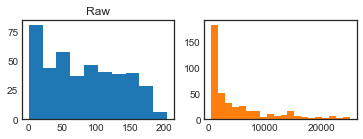

In [130]:
plt.hist(df3['salary'], bins=20)
plt.show()

Right skewed distribution.

**Continuous vs. Categorial Variables**

In [131]:
# unique values
for col in df3.columns:
    print('There are {} unique variables for {}'.format((len(df[col].unique())), col))

There are 206 unique variables for salary
There are 2 unique variables for lgID
There are 105 unique variables for R
There are 175 unique variables for H
There are 41 unique variables for HR
There are 106 unique variables for RBI
There are 34 unique variables for SB
There are 145 unique variables for SO


In [132]:
df3.describe()

,salary,R,H,HR,RBI,SB,SO
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,4975.725308,39.613744,80.459716,9.545024,37.822275,4.905213,65.786730
std,5880.354068,28.701843,55.159730,9.446014,28.798739,7.791555,42.391816
min,507.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,525.440000,14.000000,28.250000,2.000000,12.000000,0.000000,29.000000
50%,2500.000000,36.000000,73.500000,7.000000,34.000000,2.000000,63.000000
75%,6900.000000,61.750000,128.500000,15.000000,58.000000,6.000000,98.000000
max,25000.000000,122.000000,205.000000,44.000000,130.000000,58.000000,187.000000


The only categorical variable here is team name. The remaining variables are all continuous.

**Examining my continuous variables**

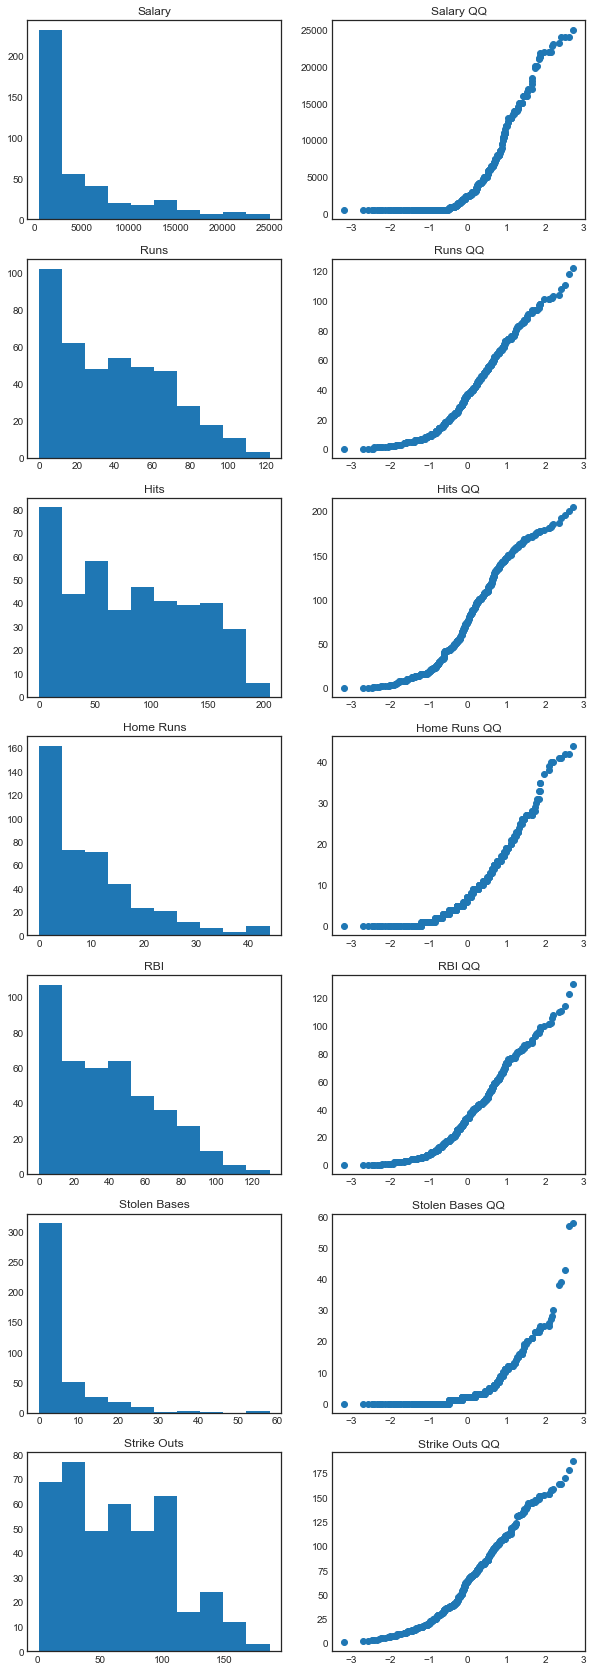

In [133]:
f, ax = plt.subplots(figsize=(10,30))
norm = sorted(np.random.normal(0,1,422))

plt.subplot(7,2,1)
plt.hist(df3['salary'])
plt.title('Salary')

plt.subplot(7,2,2)
plt.scatter(norm, sorted(df3.salary))
plt.title('Salary QQ')

plt.subplot(7,2,3)
plt.hist(df3['R'])
plt.title('Runs')

plt.subplot(7,2,4)
plt.scatter(norm, sorted(df3.R))
plt.title('Runs QQ')

plt.subplot(7,2,5)
plt.hist(df3['H'])
plt.title('Hits')

plt.subplot(7,2,6)
plt.scatter(norm, sorted(df3.H))
plt.title('Hits QQ')

plt.subplot(7,2,7)
plt.hist(df3['HR'])
plt.title('Home Runs')

plt.subplot(7,2,8)
plt.scatter(norm, sorted(df3.HR))
plt.title('Home Runs QQ')

plt.subplot(7,2,9)
plt.hist(df3['RBI'])
plt.title('RBI')

plt.subplot(7,2,10)
plt.scatter(norm, sorted(df3.RBI))
plt.title('RBI QQ')

plt.subplot(7,2,11)
plt.hist(df3['SB'])
plt.title('Stolen Bases')

plt.subplot(7,2,12)
plt.scatter(norm, sorted(df3.SB))
plt.title('Stolen Bases QQ')

plt.subplot(7,2,13)
plt.hist(df3['SO'])
plt.title('Strike Outs')

plt.subplot(7,2,14)
plt.scatter(norm, sorted(df3.SO))
plt.title('Strike Outs QQ')

plt.tight_layout
plt.show()

Uniform (right) skew across all of these distribtuions. The QQ plots show that these distributions are non-nominal.

In [134]:
# subset of data with continuous variables only.
cont = df3.loc[:, ['salary', 'R', 'H', 'HR', 'RBI', 'SB', 'SO']]

In [135]:
# Make the scatterplot matrix
# Set the default plot aesthetics
sns.set_style('white')
# Create a data frame of random noise

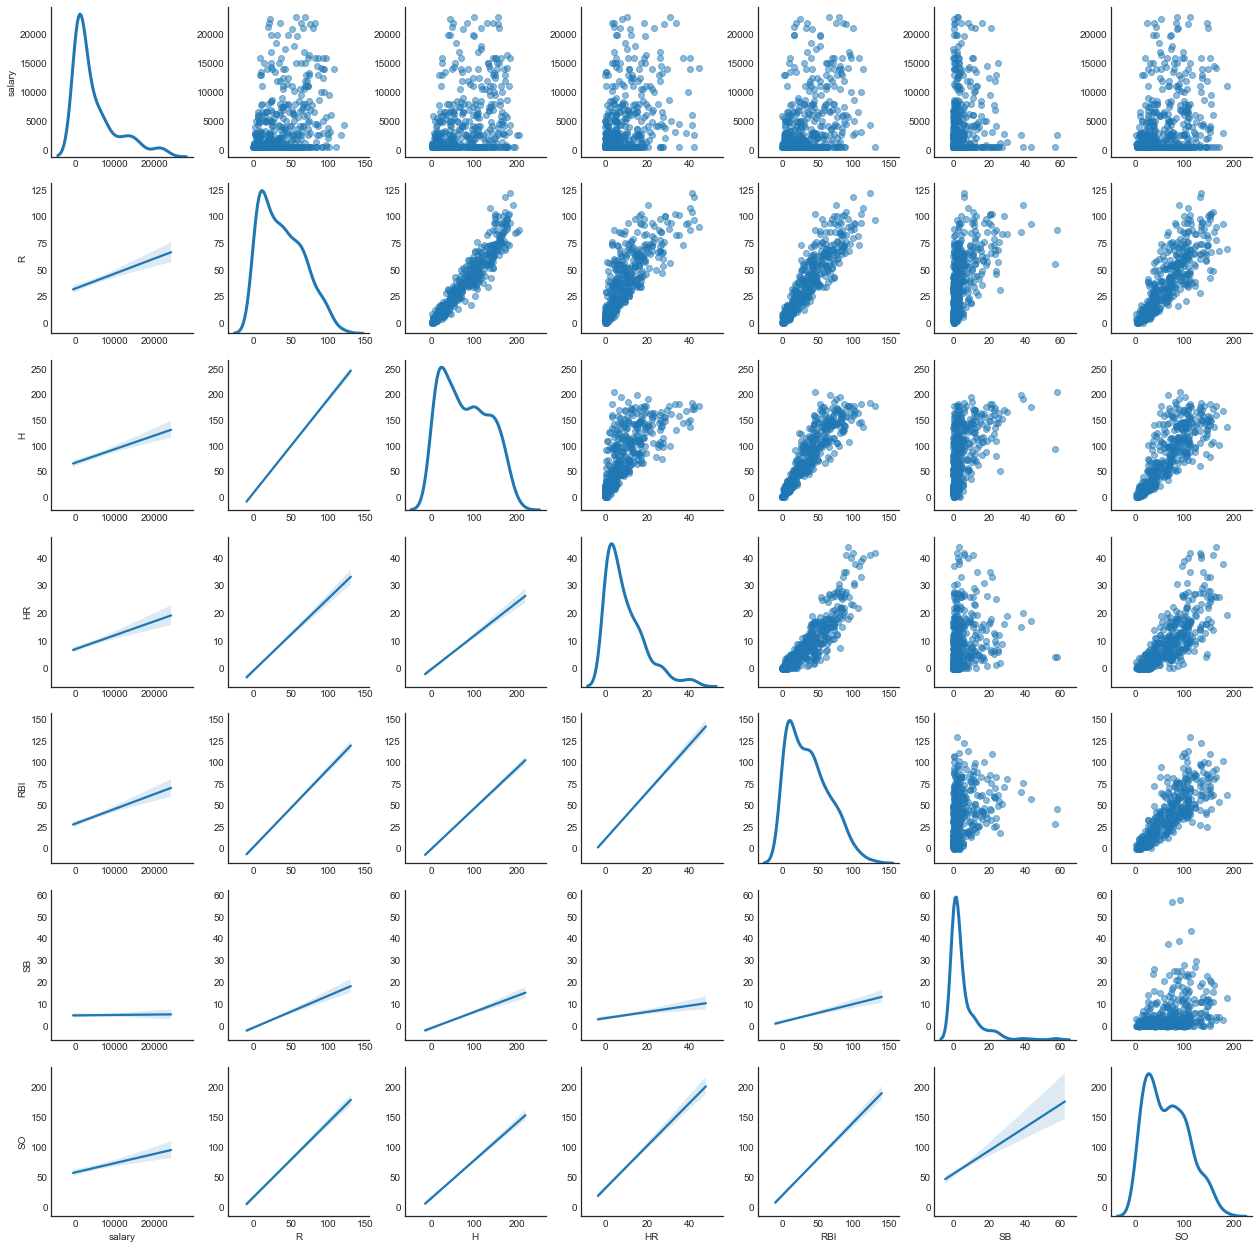

In [136]:
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(cont.shape)),
    columns = cont.columns
)

# Combine the data and the noise.
cont = cont.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(cont.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

          salary         R         H        HR       RBI        SB        SO
salary  1.000000  0.273976  0.270092  0.302682  0.336359  0.013408  0.201714
R       0.273976  1.000000  0.949113  0.798815  0.903676  0.531265  0.832919
H       0.270092  0.949113  1.000000  0.707622  0.895515  0.512951  0.804295
HR      0.302682  0.798815  0.707622  1.000000  0.894790  0.170524  0.778360
RBI     0.336359  0.903676  0.895515  0.894790  1.000000  0.298044  0.816489
SB      0.013408  0.531265  0.512951  0.170524  0.298044  1.000000  0.354454
SO      0.201714  0.832919  0.804295  0.778360  0.816489  0.354454  1.000000


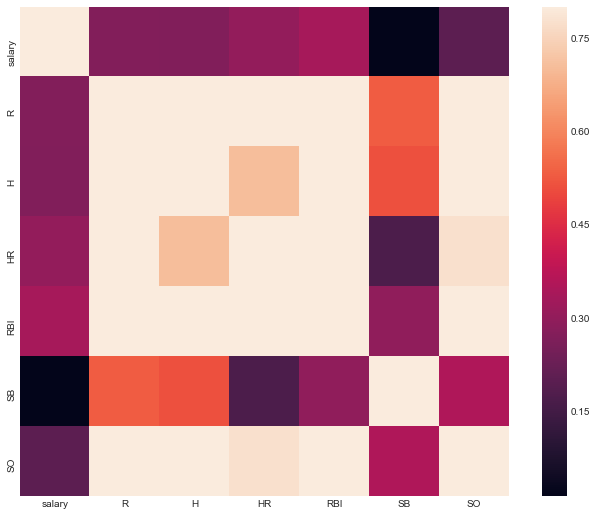

In [137]:
# Make the correlation matrix.
corrmat = cont.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize = (12,9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [138]:
df3.lgID.unique()

array(['NL', 'AL'], dtype=object)

There is high correlation between many of my variables. Stolen Bases however has lower correlation with the other variables, besides my outcome variable (Salary). Stolen Bases also has a very low correlation with Salary.

**Examining Continuous vs. Categorical**

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


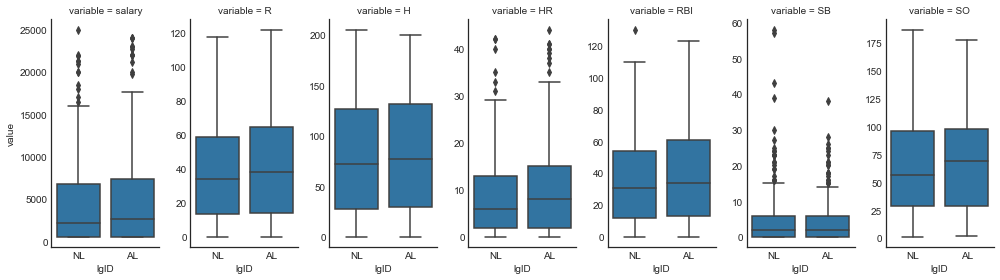

          H                                                            HR  \
      count       mean        std  min    25%   50%     75%    max  count   
lgID                                                                        
AL    210.0  81.895238  56.025955  0.0  29.50  77.5  131.75  200.0  210.0   
NL    212.0  79.037736  54.383215  0.0  27.75  72.5  126.25  205.0  212.0   

                  ...        SO        salary                            \
           mean   ...       75%    max  count         mean          std   
lgID              ...                                                     
AL    10.247619   ...     98.00  178.0  210.0  5236.947190  6112.074234   
NL     8.849057   ...     96.25  187.0  212.0  4716.967783  5643.997683   

                                                 
        min      25%     50%       75%      max  
lgID                                             
AL    507.5  528.500  2620.0  7375.000  24000.0  
NL    507.5  524.375  2100.0  6776.785

In [139]:
# Plot all the variables with boxplots for each league.

# Restructure the data so we can use FacetGrid rather an making a boxplot for each variable seperately.
df_long = df3
df_long = pd.melt(df_long, id_vars=['lgID'])

g = sns.FacetGrid(df_long, col='variable', size = 4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, 'lgID', 'value')
plt.show()

# Descriptive statistics by group.
print(df3.groupby('lgID').describe())

# Test whether group differences are significant.
for col in df3.loc[:, ['salary','R','H','HR','RBI','SB','SO']].columns:
    print(col)
    print(stats.ttest_ind(
        df3[df3['lgID'] == 'NL'][col].dropna(),
        df3[df3['lgID'] == 'AL'][col].dropna()
    ))

Based on the t tests, there is no significant difference between each variable and the leagues.

**Feature Selection**

In [140]:
# for team name, I will turn the leage into indicator dummy variables.
# also will create a dataframe to hold my features.

features = pd.get_dummies(df3['lgID'])

#Covert categorical var into dummies

In [141]:
# add salary to features in data frame
features['salary'] = df3['salary']

In [153]:
# highest correlated vars (Runs and Hits)
means = df3[['H', 'R']].mean(axis=0)
stds = df3[['H', 'R']].std(axis=0)
features['H_R_avg'] = ((df3[['H', 'R']] - means) / stds).mean(axis=1)

In [154]:
# Check how well the composite correlates with the variables.
plotdf = df3.loc[:, ['H','R']]
plotdf['H_R_avg'] = features ['H_R_avg']
corrmat2 = plotdf.corr()

print(corrmat2)

                H         R   H_R_avg
H        1.000000  0.949464  0.987285
R        0.949464  1.000000  0.987285
H_R_avg  0.987285  0.987285  1.000000


In [156]:
# Dealing with non-normality.

# Make a four-panel plot
# Let's look at Runs first
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df3['R'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['R'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['R'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist(1/df3['R'].dropna())
plt.title('Inverse')
plt.show()


c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


ValueError: range parameter must be finite.

In [ ]:
# Distribution for Hits
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df3['H'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['H'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['H'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df3['H'].dropna()))
plt.title('Inverse')
plt.show()

In [148]:
max(np.log(df3['H'].dropna()))

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


5.3230099791384085

In [149]:
max(np.log(df3['H'].dropna()))

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


5.3230099791384085

In [152]:
min(np.log(df3['H'].dropna()))

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [162]:
min(df3['R'])

0.0

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


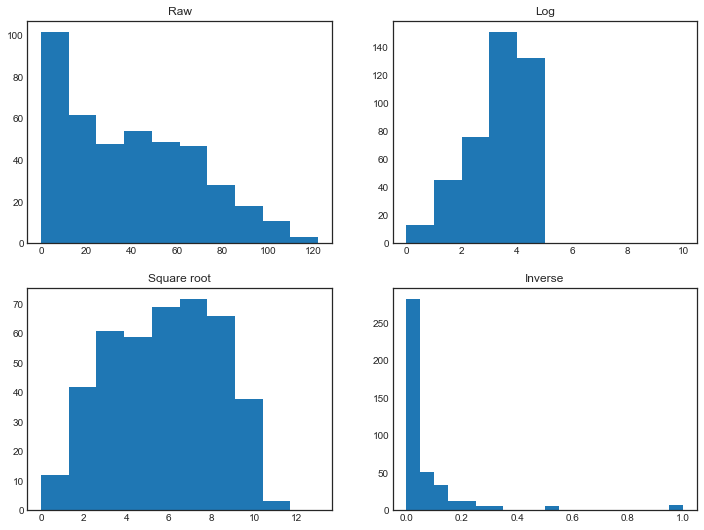

In [166]:
#nonnormality
# Check dist for Runs first
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df3['R'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['R'].dropna()),range =(0,10))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['R'].dropna()),range =(0,13))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df3['R'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()

Square root looks like it has the most normal looking distribution. I will make it a feature.

In [167]:
features['sqrt_runs'] = np.sqrt(df3['R'].dropna())

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


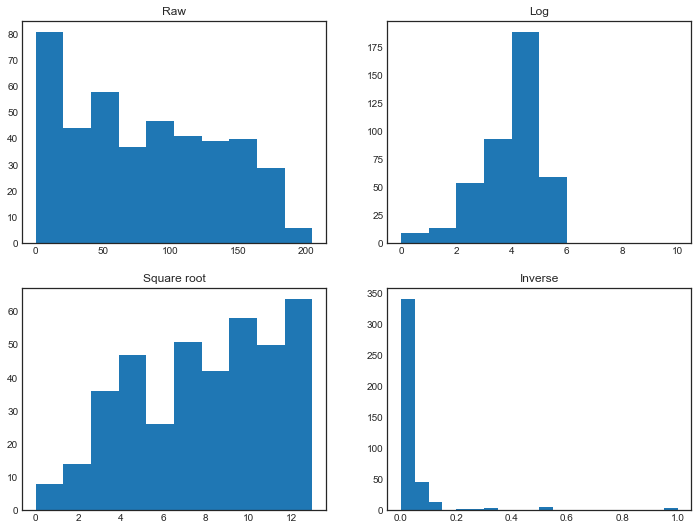

In [173]:
# distribution for hits
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df3['H'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['H'].dropna()),range =(0,10))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['H'].dropna()),range =(0,13))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df3['H'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()

While still a bit right skewed. Log looks to be most normal distribution for hits. Will make this a feature as well.

In [169]:
features['log_hits'] = np.log(df3['H'].dropna())

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


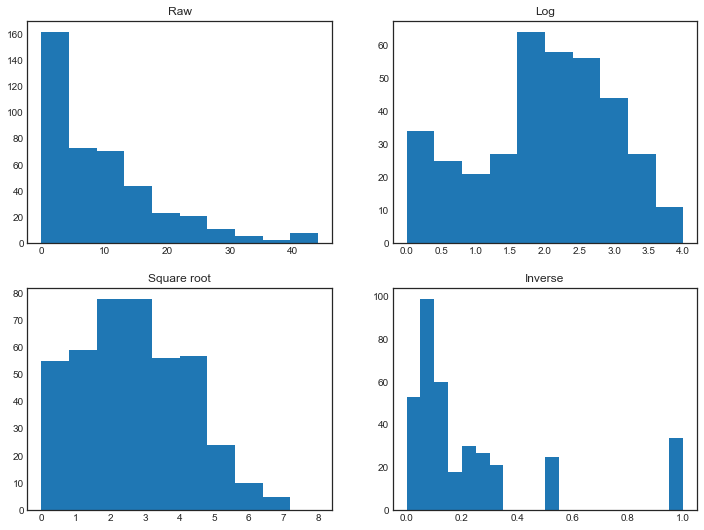

In [171]:
# distribtuion for Home Runs.
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df3['HR'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['HR'].dropna()),range =(0,4))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['HR'].dropna()),range =(0,8))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df3['HR'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()

Square root still has right skew but will use as feature.

In [172]:
features['sqrt_HR'] = np.sqrt(df3['HR'].dropna())

c:\users\aweissma\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


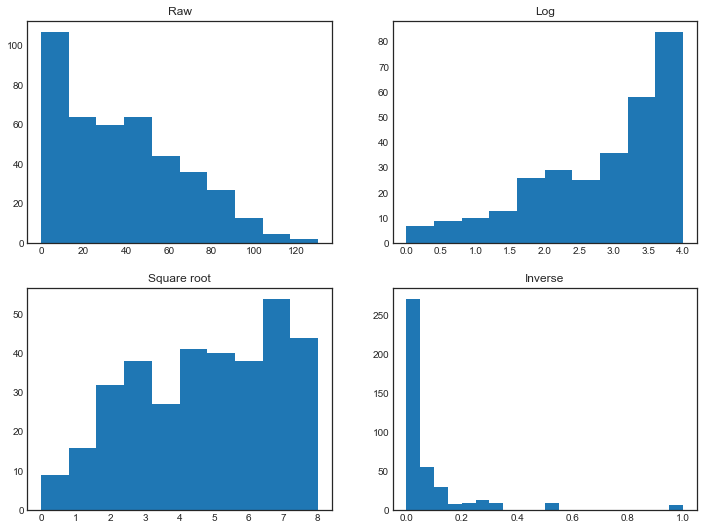

In [174]:
# distribtuion for RBI.
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df3['RBI'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['RBI'].dropna()),range =(0,4))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['RBI'].dropna()),range =(0,8))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df3['RBI'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()

Square root still has right skew but will use as feature.

In [175]:
features['sqrt_RBI'] = np.sqrt(df3['RBI'].dropna())

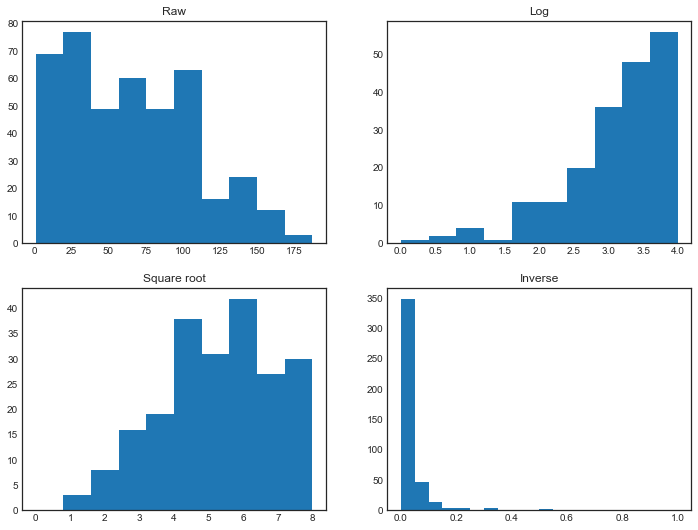

In [176]:
# distribtuion for Strike Outs.
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df3['SO'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['SO'].dropna()),range =(0,4))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['SO'].dropna()),range =(0,8))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df3['SO'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()

In [177]:
print('max log: ', max(np.log(df3['SO'].dropna())))
print('min log: ', min(np.log(df3['SO'].dropna())))
print('max sqrt: ', max(np.sqrt(df3['SO'].dropna())))
print('min sqrt: ', min(np.sqrt(df3['SO'].dropna())))

max log:  5.231108616854587
min log:  0.0
max sqrt:  13.674794331177344
min sqrt:  1.0


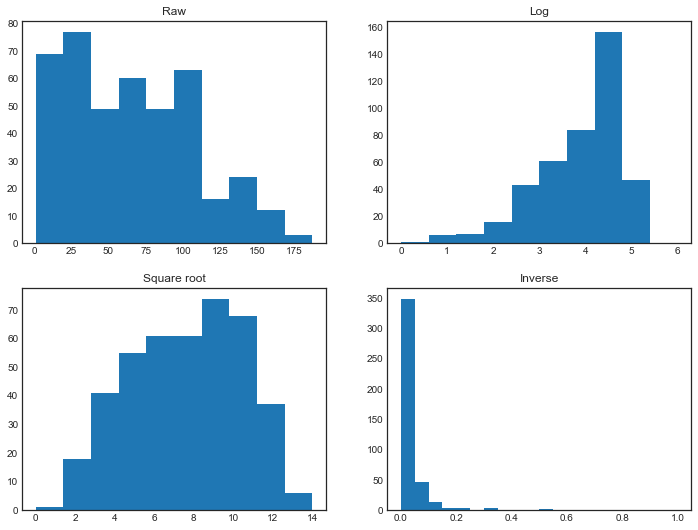

In [180]:
# distribtuion for Strike Outs.
fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df3['SO'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df3['SO'].dropna()),range =(0,6))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df3['SO'].dropna()),range =(0,14))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/df3['SO'].dropna()),range =(0,1),bins=20)
plt.title('Inverse')
plt.show()

In [181]:
features['sqrt_SO'] = np.sqrt(df3['SO'])

Will not check distribution for stolen bases as it had low correlation with variables and outcome.

In [183]:
# PCA of highly correlated variables.
df_pca = df3.loc[:, ['R', 'H', 'HR', 'RBI', 'SO']].dropna()

In [184]:
# Normalize the data so all vars have a mean of 0 and a standard deviation of 1.
X = StandardScaler().fit_transform(df_pca)

In [185]:
# The NumPy covariance function assumes that variables are reprensented by rows, not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.0023753   0.95171923  0.8012617   0.90617632  0.83158918]
 [ 0.95171923  1.0023753   0.71076487  0.89846744  0.8030303 ]
 [ 0.8012617   0.71076487  1.0023753   0.89804567  0.77191497]
 [ 0.90617632  0.89846744  0.89804567  1.0023753   0.81468064]
 [ 0.83158918  0.8030303   0.77191497  0.81468064  1.0023753 ]]


In [187]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [190]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'compenent calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.46146288]
 [ 0.44877713]
 [ 0.42836538]
 [ 0.4638656 ]
 [ 0.4324152 ]]
Eigenvalue 1: 4.361862031697099
----------------------------------------
Eigenvector 2: 
[[-0.44518956]
 [ 0.63788773]
 [ 0.3837143 ]
 [-0.49646799]
 [-0.03447258]]
Eigenvalue 2: 0.023037342537871514
----------------------------------------
Eigenvector 3: 
[[ 0.68414291]
 [-0.1880721 ]
 [ 0.25897874]
 [-0.6482963 ]
 [-0.09601714]]
Eigenvalue 3: 0.06865275075441227
----------------------------------------
Eigenvector 4: 
[[ 0.30531437]
 [ 0.55823698]
 [-0.75819763]
 [-0.14244054]
 [-0.00128661]]
Eigenvalue 4: 0.3264292688757631
----------------------------------------
Eigenvector 5: 
[[-0.16610204]
 [-0.21142065]
 [-0.16532633]
 [-0.31268329]
 [ 0.8958838 ]]
Eigenvalue 5: 0.23189509069541975
----------------------------------------
The percentage of total variance in the dataset explained by each compenent calculated by hand.
 [ 0.87030517  0.00459655  0.01369801  0.06513115  0.04626912]


Eigenvector 1 has has the highest eigenvalue.

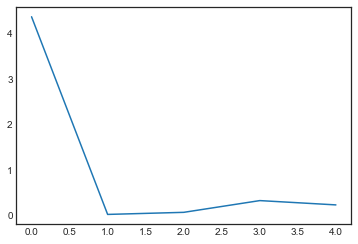

In [191]:
plt.plot(eig_val_cov)
plt.show()

The scree plot shows I should only keep the first component.

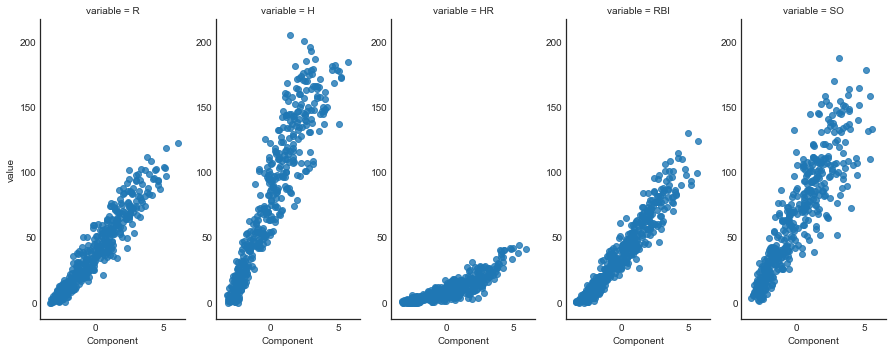

In [193]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['R','H','HR','RBI','SO']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col='variable', size=5, aspect=.5)
g = g.map(
    sns.regplot,
    'Component',
    'value',
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.87030517]


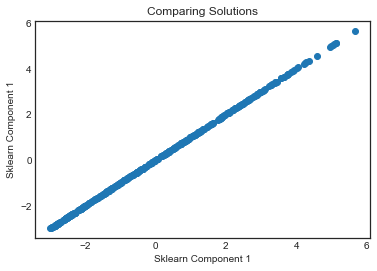

In [195]:
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing Solutions')
plt.xlabel('Sklearn Component 1')
plt.ylabel('Sklearn Component 1')
plt.show()

In [196]:
features['pca_comp1'] = Y_sklearn

In [197]:
features

,AL,NL,salary,High_HR,High_SB,R_div_H,H_R_avg,sqrt_runs,log_hits,sqrt_HR,sqrt_RBI,sqrt_SO,pca_comp1
0,0,1,507.50,0,1,0.516129,-0.859695,4.000000,3.433987,1.414214,3.464102,5.744563,-1.876805
1,0,1,507.50,0,1,0.000000,-1.410360,0.000000,0.000000,0.000000,0.000000,2.645751,-2.928570
2,0,1,507.50,0,1,0.684211,-1.020731,3.605551,2.944439,0.000000,2.000000,4.123106,-2.406059
3,0,1,507.50,0,1,0.652174,-0.949632,3.872983,3.135494,1.000000,2.645751,6.324555,-2.012612
4,0,1,507.50,0,1,0.153846,-1.266744,1.414214,2.564949,0.000000,1.414214,2.236068,-2.786801
5,0,1,507.50,0,1,0.850000,-0.941985,4.123106,2.995732,1.732051,3.605551,3.316625,-2.113457
6,1,0,507.50,0,1,0.301887,0.098877,5.656854,4.663439,2.645751,6.403124,9.486833,0.268457
7,0,1,507.50,0,0,0.436508,0.680840,7.416198,4.836282,2.449490,7.211103,10.954451,1.239961
8,0,1,507.50,0,1,0.488889,-0.628268,4.690416,3.806662,2.000000,4.000000,5.830952,-1.500662
9,0,1,507.50,0,1,0.416667,-1.223547,2.236068,2.484907,1.000000,2.000000,3.741657,-2.577088


In [198]:
features = features.dropna()

In [199]:
features

,AL,NL,salary,High_HR,High_SB,R_div_H,H_R_avg,sqrt_runs,log_hits,sqrt_HR,sqrt_RBI,sqrt_SO,pca_comp1
0,0,1,507.50,0,1,0.516129,-0.859695,4.000000,3.433987,1.414214,3.464102,5.744563,-1.876805
1,0,1,507.50,0,1,0.000000,-1.410360,0.000000,0.000000,0.000000,0.000000,2.645751,-2.928570
2,0,1,507.50,0,1,0.684211,-1.020731,3.605551,2.944439,0.000000,2.000000,4.123106,-2.406059
3,0,1,507.50,0,1,0.652174,-0.949632,3.872983,3.135494,1.000000,2.645751,6.324555,-2.012612
4,0,1,507.50,0,1,0.153846,-1.266744,1.414214,2.564949,0.000000,1.414214,2.236068,-2.786801
5,0,1,507.50,0,1,0.850000,-0.941985,4.123106,2.995732,1.732051,3.605551,3.316625,-2.113457
6,1,0,507.50,0,1,0.301887,0.098877,5.656854,4.663439,2.645751,6.403124,9.486833,0.268457
7,0,1,507.50,0,0,0.436508,0.680840,7.416198,4.836282,2.449490,7.211103,10.954451,1.239961
8,0,1,507.50,0,1,0.488889,-0.628268,4.690416,3.806662,2.000000,4.000000,5.830952,-1.500662
9,0,1,507.50,0,1,0.416667,-1.223547,2.236068,2.484907,1.000000,2.000000,3.741657,-2.577088
